**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [6]:
params = {'max_depth': [3,6,9,12], 'n_estimators': [10, 50, 100, 200]} 
params

{'max_depth': [3, 6, 9, 12], 'n_estimators': [10, 50, 100, 200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
gsc = GridSearchCV(estimator= rf,param_grid=params, scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=5, verbose=2,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)


____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [14]:
best_gsc = gsc.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=10, total=   0.3s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.3s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.3s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.3s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.3s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.3s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.3s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.3s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  6.4min finished
C:\Users\Mrinal\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [16]:
#gsc.grid_scores_
gsc.cv_results_

{'mean_fit_time': array([ 0.2474165 ,  1.21794181,  2.40892797,  4.87006235,  0.41582699,
         2.06943636,  4.10505419,  8.22223997,  0.57267575,  2.85298071,
         5.61810169, 11.49181132,  0.72405086,  3.58453536,  7.19728246,
        14.44498844]),
 'std_fit_time': array([0.00680668, 0.01436468, 0.02518877, 0.03426177, 0.00174879,
        0.02257062, 0.02889797, 0.03894742, 0.01654276, 0.03035637,
        0.10040489, 0.0503048 , 0.00887288, 0.02851872, 0.03239285,
        0.1171071 ]),
 'mean_score_time': array([0.01154766, 0.03596406, 0.07282858, 0.13338499, 0.0119874 ,
        0.04731669, 0.08315392, 0.16393099, 0.01565585, 0.05525093,
        0.10695529, 0.21490154, 0.017314  , 0.06830378, 0.13519225,
        0.27275391]),
 'std_score_time': array([0.00193771, 0.00121973, 0.00540126, 0.00438334, 0.00116161,
        0.00447842, 0.00568591, 0.00431782, 0.00079803, 0.00386384,
        0.00645491, 0.00654049, 0.0023662 , 0.00305207, 0.00402598,
        0.00463507]),
 'param_ma

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [17]:
gsc_df = pd.DataFrame(gsc.cv_results_)
gsc_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.247416,0.006807,0.011548,0.001938,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.746594,0.745945,0.751689,...,0.756495,0.010642,16,0.766549,0.764293,0.760630,0.757388,0.762718,0.762316,0.003134
1,1.217942,0.014365,0.035964,0.001220,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.753248,0.755398,0.758032,...,0.763233,0.010569,12,0.772938,0.770815,0.769056,0.765923,0.768058,0.769358,0.002388
2,2.408928,0.025189,0.072829,0.005401,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.751308,0.755503,0.757298,...,0.762674,0.011004,14,0.771874,0.770492,0.769539,0.765579,0.767667,0.769030,0.002203
3,4.870062,0.034262,0.133385,0.004383,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.751069,0.756028,0.756214,...,0.762871,0.011403,13,0.772371,0.770772,0.770333,0.766452,0.768141,0.769614,0.002080
4,0.415827,0.001749,0.011987,0.001162,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.759909,0.759460,0.764322,...,0.767000,0.008351,11,0.794077,0.795131,0.795450,0.789916,0.796530,0.794221,0.002290
5,2.069436,0.022571,0.047317,0.004478,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.763926,0.768048,0.768751,...,0.773181,0.009090,9,0.802948,0.802313,0.801690,0.797803,0.800954,0.801141,0.001795
6,4.105054,0.028898,0.083154,0.005686,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.765222,0.769034,0.768328,...,0.773514,0.008734,8,0.804915,0.804176,0.803300,0.799234,0.801999,0.802725,0.001997
7,8.222240,0.038947,0.163931,0.004318,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.764659,0.770214,0.768653,...,0.774034,0.008928,6,0.805256,0.804326,0.803669,0.800255,0.802576,0.803217,0.001719
8,0.572676,0.016543,0.015656,0.000798,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.757884,0.765688,0.768146,...,0.767743,0.006633,10,0.854663,0.853949,0.851903,0.849506,0.853962,0.852797,0.001887
9,2.852981,0.030356,0.055251,0.003864,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.769398,0.776596,0.772401,...,0.776971,0.006503,3,0.867359,0.867332,0.864649,0.863361,0.865258,0.865592,0.001557


**Find the best hyperparameters from the cross-validation.**

In [18]:
best_parameters = gsc.best_params_
print(best_parameters)

{'max_depth': 9, 'n_estimators': 200}


In [19]:
# MEAN TEST SCORE
gsc.best_score_

0.7777564543265898

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [20]:
# Create a 5x5 grid
xx_rf, yy_rf = np.meshgrid(range(5), range(5))

In [21]:
# Set color map to `plt.cm.jet`
cm = plt.cm.jet

Text(0, 0.5, 'Maximum depth')

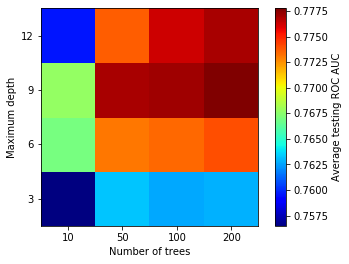

In [23]:
# Visualize pcolormesh
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, gsc_df['mean_test_score'].values.reshape((4,4)), cmap=cm)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [25]:
# Create a dataframe of the feature names and importance
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':gsc.best_estimator_.feature_importances_
})

In [26]:
# Sort values by importance
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.437439
0,LIMIT_BAL,0.059961
11,PAY_AMT1,0.059434
12,PAY_AMT2,0.045518
13,PAY_AMT3,0.043299
5,BILL_AMT1,0.042195
6,BILL_AMT2,0.041562
7,BILL_AMT3,0.037268
14,PAY_AMT4,0.034321
8,BILL_AMT4,0.034123
